# Laboratorio 2 - Agrupación 

### Grupo 23
- **Estudiante 1** : Ana María Hernández Lasso
- **Estudiante 2** : Juan Sebastián Ardila López
- **Estudiante 3** : William Andrés Bayona Vergara

## 1. Exploración de datos

### Carga del dataset

Primero, cargaremos el dataset desde el archivo CSV.

In [122]:
import pandas as pd
import numpy as np

#Cargamos el dataset de los datos de entrenamiento
datos_senecafe = pd.read_csv("Datos_SenecaféAlpes.csv", sep=";")

#Veamos las dimensiones del dataset
filas, columnas = datos_senecafe.shape
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

#Veamos el dataframe para entender mejor los datos
datos_senecafe

Cantidad de filas: 14291
Cantidad de columnas: 19


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.00,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.00,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.00,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.60,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.00,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,G005192,83266,1117778.00,448.473710,237.747098,Alargado,0.847920,84030.0,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319,NaN,Lavado
14287,G013419,39857,755392.00,283.623668,179.430885,Alargado,0.774448,40330.0,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183,Normal,Natural
14288,G005391,90004,1156599.00,456.836383,252.353553,Alargado,0.833583,90790.0,NaN,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035,Normal,Lavado
14289,G000861,38426,711412.00,246.696608,198.555756,redondeado,0.593467,38799.0,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826,NaN,NaN


In [123]:
#Veamos las columnas y sus tipos de datos
datos_senecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

En el diccionario de datos se hace referencia a 19 columnas. En efecto, en los datos compartidos este es el número de columnas existentes. 

### Tipos de Datos


In [124]:
#Según el tipo de dato podemos saber cuáles podrían llegar ser variables categóricas o numéricas, o si hay algo extraño

#Traemos las columnas de tipo object, que suelen ser texto
lista_variables_texto = datos_senecafe.select_dtypes(include=["object"]).columns

#Traemos las columnas de tipo int64, float64
lista_variables_numero = datos_senecafe.select_dtypes(include=['float64', 'int64']).columns

#Ahora podemos conocerlas mejor
print("Lista variables de texto:")
print(lista_variables_texto)
print("-------------")
print("Lista variables de número:")
print(lista_variables_numero)
print("-------------")
print("Cantidad de variables de texto:", len(lista_variables_texto))
print("Cantidad de variables de número:", len(lista_variables_numero))

Lista variables de texto:
Index(['ID', 'RelacionAspecto', 'DefectoVisible', 'MétodoSecado'], dtype='object')
-------------
Lista variables de número:
Index(['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida',
       'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2',
       'FactorForma3', 'FactorForma4'],
      dtype='object')
-------------
Cantidad de variables de texto: 4
Cantidad de variables de número: 15


Hemos podido ver que los nombres de las columnas presentes y el tipo de dato para cada una concuerda con la descripción dada en el diccionario de datos por la empresa.

### Consideraciones sobre los datos

Por ahora, como estamos en la etapa de entendimiento de los datos, dejaremos anotadas las observaciones a las que hemos llegado sobre los mismos:

1. La columna `RelaciónAspecto`, encargada de indicar si el grano es Alargado (> 1.3) o Redondeado (≤ 1.3), contiene términos como "Alargado" y "alargado", que aunque en el idioma español tienen el mismo significado y por ende darían una misma clasificación, en los datos se encuentran diferenciados por su inicial en letra minúscula o mayúscula. Más adelante debemos tratar eso.

2. Esto mismo sucede con columnas que ayudan a categorizar o describir mediante términos predefinidos al grano de café, como `DefectoVisible`, que indica si el grano es Normal o Defectuoso, y `MétodoSecado`, que indica el método de procesamiento postcosecha (Natural, Lavado, Honey).

### Estadisticas Descriptivas
Nos ayudarán a conocer mejor los datos que se nos han otorgado.

In [125]:
#Revisaremos las estadísticas descriptivas de variables numéricas

#Calculamos estadísticas descriptivas
estadisticas_variables_numero = datos_senecafe[lista_variables_numero].describe().T

#Agregamos la mediana
estadisticas_variables_numero['median'] = datos_senecafe[lista_variables_numero].median()

estadisticas_variables_numero

,count,mean,std,min,25%,50%,75%,max,median
Area,14291.0,53055.408999,29396.080372,-6.271600e+04,36338.000000,44660.000000,61311.000000,2.546160e+05,44660.000000
Perimetro,13054.0,772986.954791,326649.281155,-1.012143e+06,676860.750000,772034.500000,955409.750000,1.921685e+06,772034.500000
LongitudEjeMayor,13890.0,319.985592,86.378452,-4.214447e+02,253.319858,296.682345,376.548109,7.388602e+02,296.682345
LongitudEjeMenor,14291.0,202.178613,45.494541,-2.008387e+02,175.881052,192.437870,216.847844,4.601985e+02,192.437870
Excentricidad,13687.0,0.749977,0.099438,-8.350038e-01,0.715144,0.764392,0.810441,9.114230e-01,0.764392
AreaConvexa,12868.0,53575.397809,29566.387814,-7.842300e+04,36720.000000,45107.500000,62109.250000,2.510820e+05,45107.500000
DiametroEquivalente,12368.0,253.001741,60.542330,-4.484026e+02,215.302463,238.579492,279.672481,5.693744e+02,238.579492
Medida,14291.0,0.749844,0.050774,-7.987057e-01,0.718767,0.760232,0.786942,8.661946e-01,0.760232
Solidez,11985.0,0.986774,0.025947,-9.890416e-01,0.985597,0.988279,0.989991,9.943782e-01,0.988279
Redondez,12228.0,0.873080,0.063237,-8.968612e-01,0.832824,0.883353,0.916803,9.906854e-01,0.883353


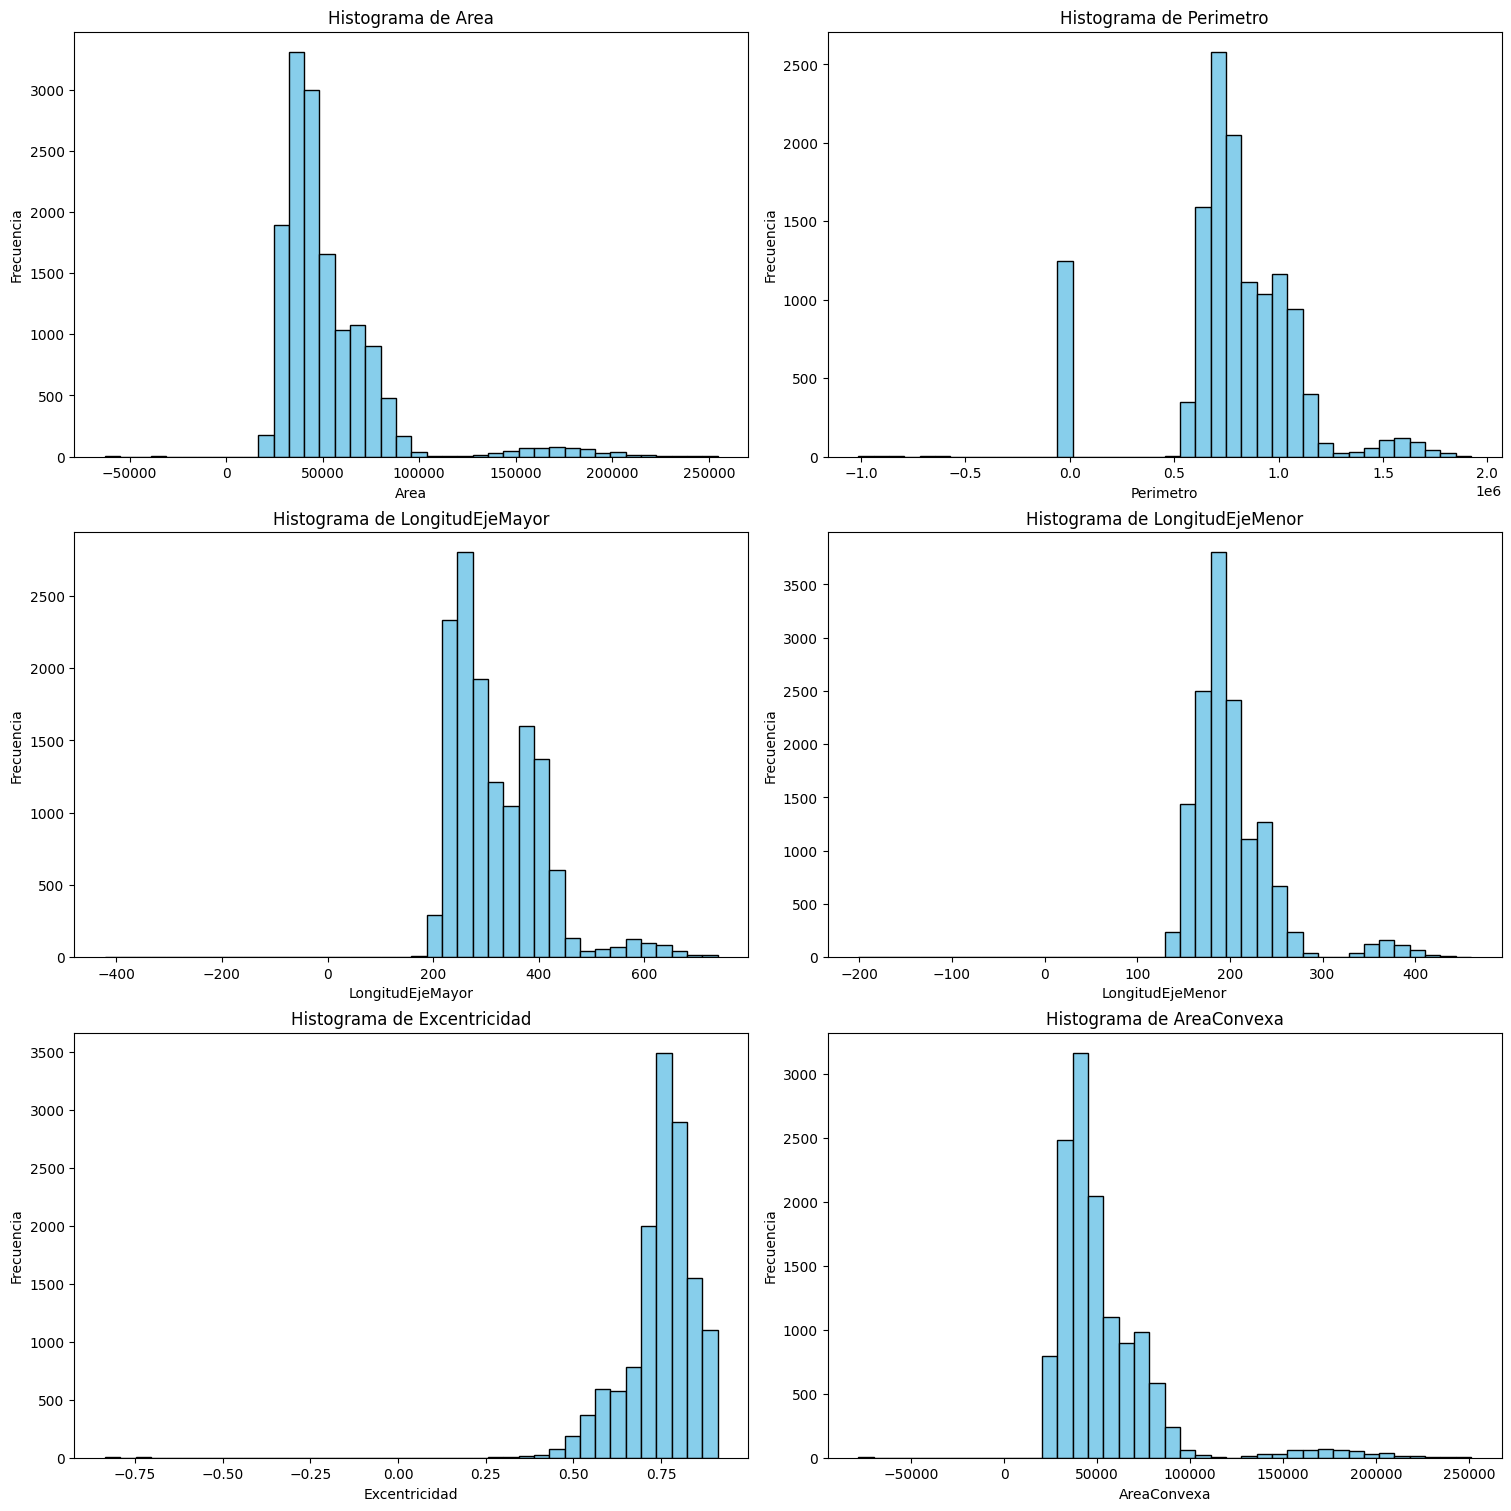

In [126]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset
import matplotlib.pyplot as plt

columnas_graficar_1 = ['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'Excentricidad', 'AreaConvexa']

fig, ax = plt.subplots(3, 2, figsize=(15, 15), layout='constrained')

#Aqui enumerate() sirve para recorrer la lista y al mismo tiempo obtener un contador.
for i, columna in enumerate(columnas_graficar_1):
    indice_fila = i // 2 #Dice en que fila va a estar el histograma
    indice_columna = i % 2 #Dice en que columna va a estar el histograma

    #Graficamos por ahora sin los valores nulos para evitar errores
    ax[indice_fila, indice_columna].hist(datos_senecafe[columna].dropna(), bins=40, color='skyblue', edgecolor='black')
    ax[indice_fila, indice_columna].set_title("Histograma de " + columna)
    ax[indice_fila, indice_columna].set_xlabel(columna)
    ax[indice_fila, indice_columna].set_ylabel('Frecuencia')

plt.show()

Esto nos permite ver que, para las variables:

- **Área:** el tamaño ocupado por un grano de café suele estar entre 25000 y 75000 píxeles de la superficie, con algunos valores que superan los 200000, los cuales son outliers. Se observan también valores negativos, que no tienen sentido físico y deben revisarse.

- **Perímetro:** la longitud de un grano suele estar entre 0.6 y 1.3 millones de unidades. Aparecen valores cercanos a cero y negativos, que no son coherentes con esta medida, que es justamente no negativa.

- **LongitudEjeMayor:** la longitud del eje mayor de un grano suele estar entre 200 y 450 unidades, aunque existen valores mayores a 600 que representan posibles outliers.

- **LongitudEjeMenor:** la longitud del eje menor suele estar entre 150 y 250 unidades, con algunos casos mayores a 400, que son outliers. También se observan valores negativos que deben revisarse.

- **Excentricidad:** la mayoría de granos presentan un valor cercano a 0.75, lo que indica formas más alargadas que circulares. Los valores negativos detectados deben revisarse, pues no se menciona esta posibilidad en el diccionario de datos. Los valores menores a 0.5 son outliers.

- **ÁreaConvexa:** el área del polígono convexo más pequeño que encierra el grano suele estar entre 25000 y 100000 píxeles, con colas largas hacia valores mayores, que son outliers. También aparecen valores negativos que debemos revisar para un área.


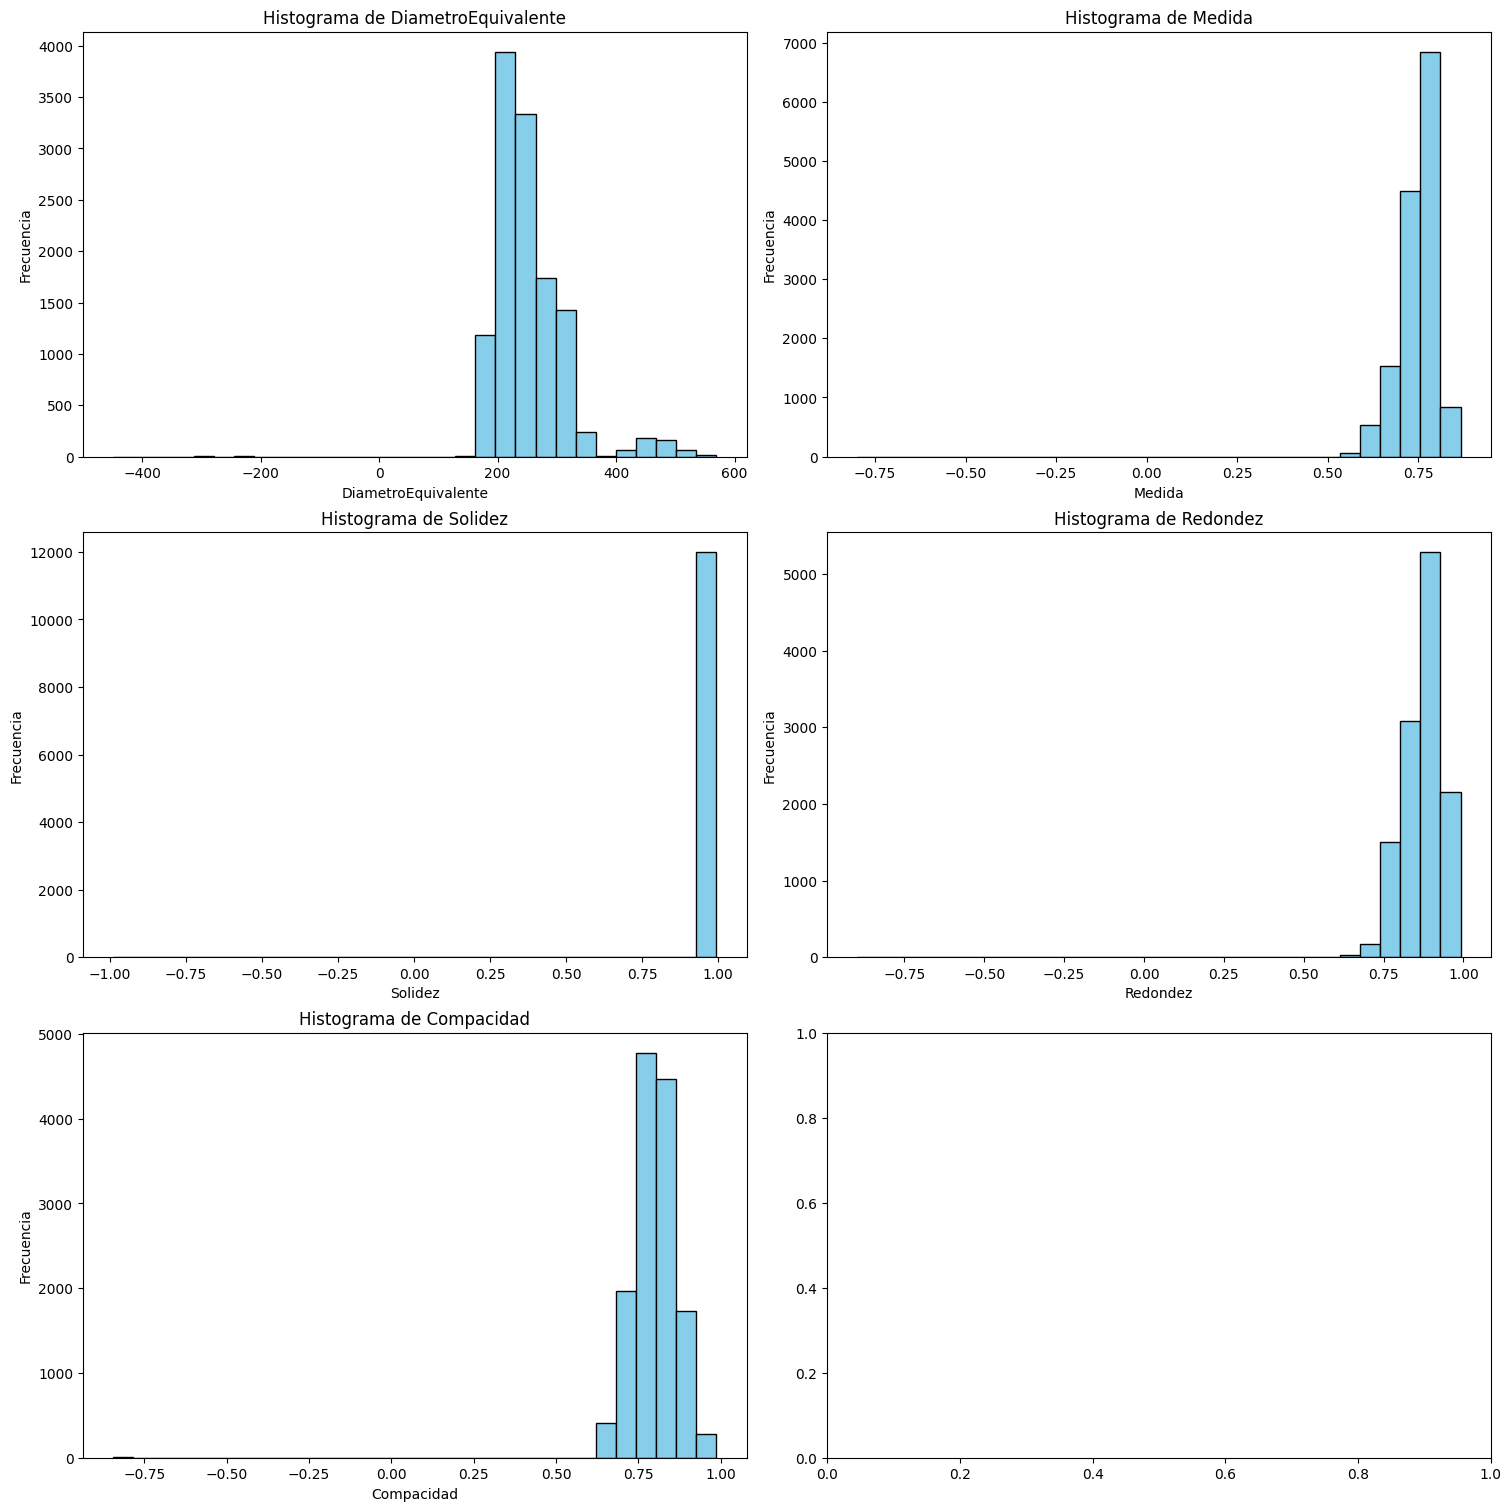

In [127]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset

columnas_graficar_1 = ['DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad']  

fig, ax = plt.subplots(3, 2, figsize=(15, 15), layout='constrained')

#Aqui enumerate() sirve para recorrer la lista y al mismo tiempo obtener un contador.
for i, columna in enumerate(columnas_graficar_1):
    indice_fila = i // 2 #Dice en que fila va a estar el histograma
    indice_columna = i % 2 #Dice en que columna va a estar el histograma

    #Graficamos por ahora sin los valores nulos para evitar errores
    ax[indice_fila, indice_columna].hist(datos_senecafe[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax[indice_fila, indice_columna].set_title("Histograma de " + columna)
    ax[indice_fila, indice_columna].set_xlabel(columna)
    ax[indice_fila, indice_columna].set_ylabel('Frecuencia')

plt.show()

Podemos observar que:

- **DiámetroEquivalente:** la mayoría de los granos se concentran entre 200 y 300 unidades, con una cola hacia valores mayores a 400. Aparecen también valores negativos, que no son físicamente posibles en una medida de diámetro.

- **Medida:** la mayoría de los granos tienen valores superiores a 0.7, lo que indica que el grano ocupa de forma adecuada el área de su espacio rectangular.

- **Solidez:** la distribución está muy concentrada en 1.0, lo cual significa que casi todos los granos son muy regulares en su forma.

- **Redondez:** los valores se concentran entre 0.75 y 1.0, lo que indica que la mayoría de los granos presentan formas muy cercanas a ser circulares. 

- **Compacidad:** los valores se concentran entre 0.75 y 0.9, lo que refleja granos compactos y cerca a ser redondeados. 

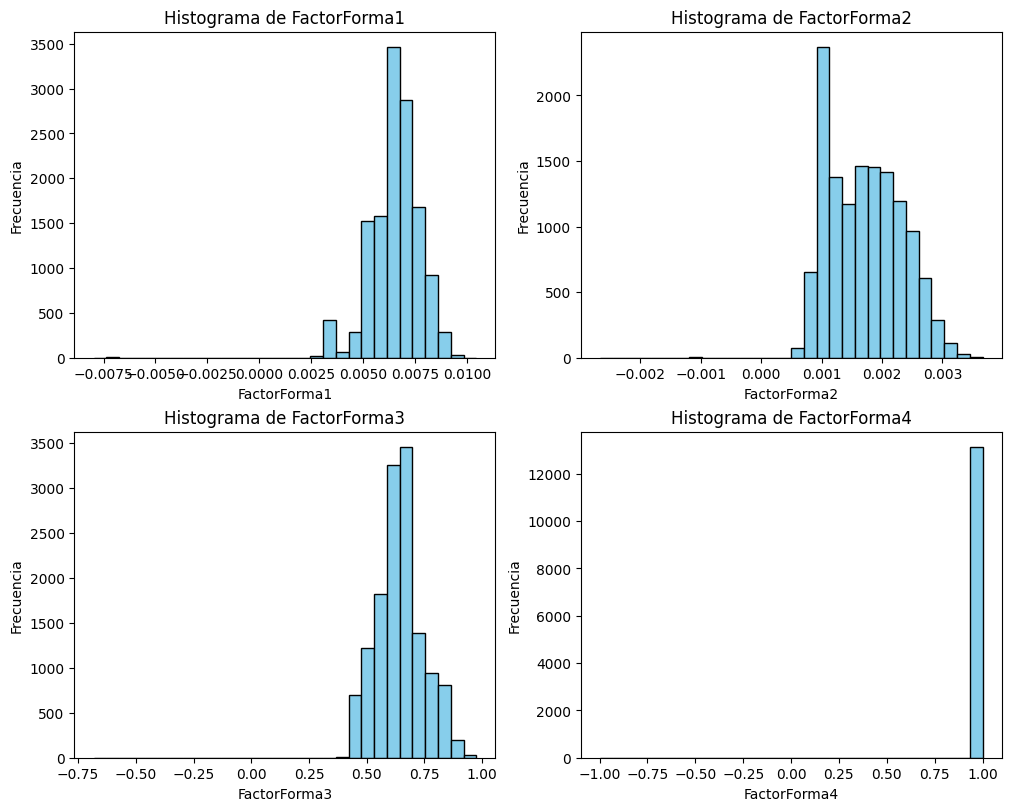

In [128]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset
columnas_graficar_1 = ['FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']

fig, ax = plt.subplots(2, 2, figsize=(10, 8), layout='constrained')

#Aqui enumerate() sirve para recorrer la lista y al mismo tiempo obtener un contador.
for i, columna in enumerate(columnas_graficar_1):
    indice_fila = i // 2 #Dice en que fila va a estar el histograma
    indice_columna = i % 2 #Dice en que columna va a estar el histograma

    #Graficamos por ahora sin los valores nulos para evitar errores
    ax[indice_fila, indice_columna].hist(datos_senecafe[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax[indice_fila, indice_columna].set_title("Histograma de " + columna)
    ax[indice_fila, indice_columna].set_xlabel(columna)
    ax[indice_fila, indice_columna].set_ylabel('Frecuencia')

plt.show()

Podemos observar lo siguiente: 

- **FactorForma1:** la mayoría de los valores se concentran entre 0.005 y 0.008. Aparecen valores negativos que son outliers.

- **FactorForma2:** los valores se concentran entre 0.001 y 0.003. Aparecen valores negativos que son outliers.

- **FactorForma3:** la mayoría de los granos se ubican con valores entre 0.5 y 0.8.

- **FactorForma4:** la distribución está concentrada en 1.0.

### Revisión de variables no numéricas

In [129]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
datos_senecafe[lista_variables_texto].describe()

,ID,RelacionAspecto,DefectoVisible,MétodoSecado
count,14291,13825,11356,13704
unique,13611,4,2,6
top,G002981,Alargado,Normal,Lavado
freq,2,12047,9096,6260


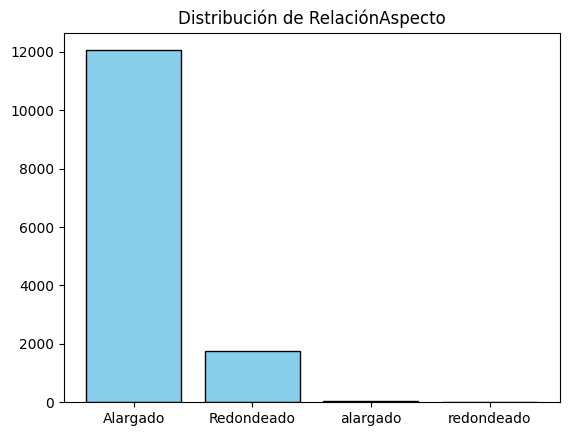

In [130]:
#Revisaremos las estadísticas descriptivas de variables que son texto

fig, ax = plt.subplots()

#Veamos las categorias
conteo = datos_senecafe["RelacionAspecto"].value_counts()

ax.bar(conteo.index, conteo.values, color='skyblue', edgecolor='black')

ax.set_title("Distribución de RelaciónAspecto")

plt.show()


Esto nos confirma que existen los valores alargado y redondeado, los cuales pueden unificarse con los respectivos Alargado y Redondeado. Además, la mayoría de granos son alargados.

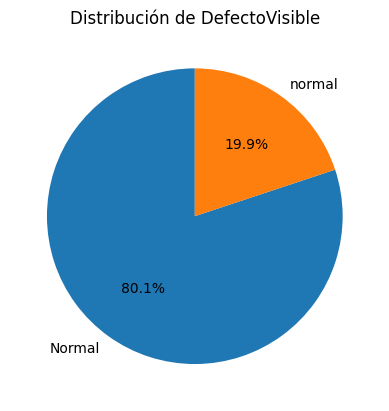

In [131]:
fig, ax = plt.subplots()

#Veamos las categorias
conteo = datos_senecafe["DefectoVisible"].value_counts()

ax.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%', startangle=90)

ax.set_title("Distribución de DefectoVisible")

plt.show()

Todos los granos de café tienen un defecto visible normal. Nuevamente, es importante recordar que normal es equivalente a Normal.

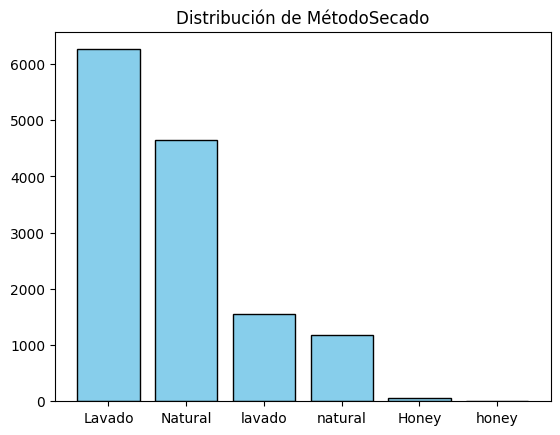

In [132]:
fig, ax = plt.subplots()

#Veamos las categorias
conteo = datos_senecafe["MétodoSecado"].value_counts()

ax.bar(conteo.index, conteo.values, color='skyblue', edgecolor='black')

ax.set_title("Distribución de MétodoSecado")

plt.show()

Nuevamente, se confirma que existen equivalencias, diferenciadas en los datos únicamente por mayúsculas, pero sin distinción en su significado práctico. La mayoría de granos de café tienen el método de procesamiento lavado.

### Descripción del entendimiento de datos 

Nos compartieron un dataset de entrenamiento con la información de 14291 granos de café, con sus determinadas características. Se identificaron 19 variables o columnas, de las cuales podemos llegar a la siguiente información:

1. Características geométricas básicas del grano: describen cómo es el espacio ocupado por el grano de café. Incluye variables como Área, Perímetro, Longitud del Eje Mayor, Longitud del Eje Menor, Área Convexa y Diámetro Equivalente, que describen directamente el tamaño y la forma física de cada grano.

2. Factores específicos del grano: reflejan qué tan alargado, compacto o circular es un grano, así como la estética general del mismo y lo diferencian e identifican de los demás granos. Incluye columnas como Relación de Aspecto, Excentricidad, Medida, Solidez, Redondez, Compacidad, ID, los Factores de Forma 1, 2, 3 y 4, Defecto Visible y Método de Secado

Además, identificamos:
- Tres variables categóricas: 'RelacionAspecto' (Alargado, Redondeado), 'DefectoVisible' (Normal, Defectuoso) y 'MetodoSecado' (Natural, Lavado, Honey). 

- Quince variables numéricas: 'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor' 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3' y 'FactorForma4. 

### Interpretación de visualización de variables categóricas:
- Las tres variables categóricas tienen categorías equivalentes, únicamente separadas por la manera en que se han escrito. Por ejemplo, Alargado es equivalente a alargado. La única diferencia radica en su escritura. 

- Los granos de café, según los diagramas realizados, suelen ser lavados, alargados y normales. 

### Interpretación de visualización y estadísticas de variables numéricas:
Gracias a las estadísticas descriptivas y los histogramas podemos ver que: 

- Algunas medidas, como perímetro, área o las longitudes de los ejes pueden tener valores negativos, o valores muy superiores (outliers, pues son pocos casos particulares).

- Variables como excentricidad, solidez, redondez y compacidad se distribuyen en los rangos esperados (cercanos a 0.7–1), aunque también se detectan registros negativos incoherentes.  

## 2. Análisis de calidad de los datos
Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.

### Completitud: revisar valores nulos

In [133]:
#Vemos cuántos nulos hay por columna
nulos = datos_senecafe.isnull().sum()

print("Cantidad de nulos por columna")
#Ordenamos los nulos de mayor a menor
nulos = nulos.sort_values(ascending=False)
display(nulos)

print("Porcentaje de nulos por columna")
# Cálculo de porcentaje de valores nulos por columna
(((nulos/datos_senecafe.shape[0]))* 100).sort_values(ascending=False) 

Cantidad de nulos por columna


DefectoVisible         2935
Solidez                2306
Redondez               2063
DiametroEquivalente    1923
AreaConvexa            1423
Perimetro              1237
FactorForma4           1159
FactorForma1           1119
FactorForma2           1106
Compacidad              650
Excentricidad           604
MétodoSecado            587
FactorForma3            478
RelacionAspecto         466
LongitudEjeMayor        401
Area                      0
ID                        0
Medida                    0
LongitudEjeMenor          0
dtype: int64

Porcentaje de nulos por columna


DefectoVisible         20.537401
Solidez                16.136030
Redondez               14.435659
DiametroEquivalente    13.456021
AreaConvexa             9.957316
Perimetro               8.655797
FactorForma4            8.109999
FactorForma1            7.830103
FactorForma2            7.739137
Compacidad              4.548317
Excentricidad           4.226436
MétodoSecado            4.107480
FactorForma3            3.344762
RelacionAspecto         3.260794
LongitudEjeMayor        2.805962
Area                    0.000000
ID                      0.000000
Medida                  0.000000
LongitudEjeMenor        0.000000
dtype: float64

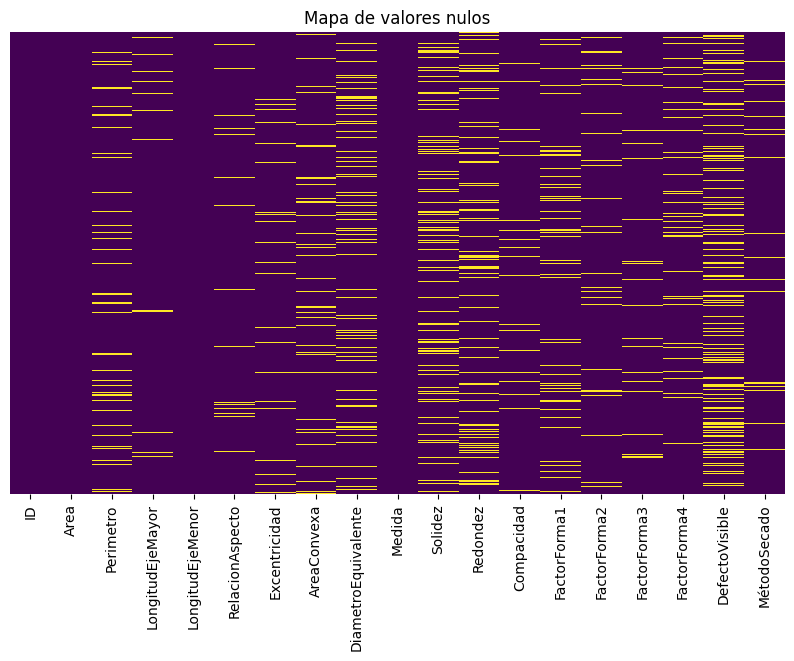

In [134]:
#Hacemos el mapa de valores nulos
#Los valores nulos se encuentran en amarillo.
import seaborn as sns 
plt.figure(figsize=(10, 6))
sns.heatmap(datos_senecafe.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()

Podemos observar que hay 15 columnas que contienen valores nulos, donde DefectoVisible es la que tiene mayor cantidad de nulos (20.53%, es decir, 2935 registros con esa variable nula), mientras que LongitudEjeMayor tiene la menor cantidad de nulos (3.26%, es decir, 401 registros con esa variable nula).

### Unicidad: revisar filas duplicadas

In [135]:
#Revisamos las filas duplicadas completas
num_duplicados = datos_senecafe.duplicated().sum()
print("Número de filas duplicadas completas:", num_duplicados)

#Revisamos las filas duplicadas parciales por Jugador, Posición y Día del partido
variables_para_duplicados = ['ID']

print("-----")
duplicados_parciales = datos_senecafe.duplicated(subset=variables_para_duplicados, keep=False)
num_duplicados_parciales = duplicados_parciales.sum()
print("Número de duplicados parciales (según ID del grano de café):", num_duplicados_parciales)

print("-----")
print("Ejemplo de un duplicado: ")

#Detectar IDs duplicados
ids_duplicados = datos_senecafe[datos_senecafe["ID"].duplicated()]["ID"].unique()

#Queremos, por ejemplo, ver todas las filas del primer ID duplicado
ejemplo = datos_senecafe[datos_senecafe["ID"] == ids_duplicados[0]]
display(ejemplo)

# Mostrar algunos ejemplos
print("-----")
print("Ejemplos de duplicados parciales:")
display(datos_senecafe[duplicados_parciales].head(10))


Número de filas duplicadas completas: 461
-----
Número de duplicados parciales (según ID del grano de café): 1360
-----
Ejemplo de un duplicado: 


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
126,G001698,44524,758387.0,258.916322,219.129976,Redondeado,NaN,44860.0,238.096026,0.782977,NaN,0.972797,0.919587,0.005815,0.002565,0.84564,0.999178,Normal,Lavado
384,G001698,44524,758387.0,258.916322,219.129976,Redondeado,NaN,44860.0,238.096026,0.782977,NaN,0.972797,0.919587,0.005815,0.002565,0.84564,0.999178,Normal,Lavado


-----
Ejemplos de duplicados parciales:


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
16,G000100,33143,NaN,222.526309,189.737379,Redondeado,0.522480,33377.0,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,NaN,0.852195,NaN,Normal,NaN
20,G012961,36876,707667.0,261.019476,180.562424,Alargado,0.722129,37270.0,216.684059,0.716136,0.989428,0.925328,0.830145,0.007078,0.002074,0.689141,0.996216,Normal,Natural
27,G002040,46774,833722.0,305.703887,196.146061,Alargado,0.767022,47446.0,244.037920,0.793910,0.985837,0.845613,0.798282,0.006536,0.001637,0.637254,0.993194,normal,lavado
30,G009056,45954,795062.0,294.820672,199.020609,Alargado,0.737766,46398.0,241.889334,0.780296,0.990431,0.913548,0.820463,0.006416,0.001793,0.673159,0.997189,Normal,Lavado
37,G000534,36568,691529.0,241.392193,193.119305,Redondeado,0.599969,36883.0,215.777255,0.789669,0.991459,0.960927,0.893887,0.006601,0.002600,0.799033,0.998763,Normal,Lavado
39,G000863,38445,705779.0,235.182533,208.473973,Redondeado,0.462854,38763.0,221.245778,0.769670,NaN,0.969867,0.940741,NaN,0.002955,0.884993,0.998374,normal,lavado
40,G011077,29081,636593.0,237.301527,156.431380,Alargado,0.751959,29481.0,192.424217,0.703680,0.986432,0.901769,0.810885,0.008160,0.002176,0.657534,0.997459,Normal,Natural
44,G005640,42450,NaN,347.951525,156.469366,Alargado,0.893186,42820.0,232.484448,0.609388,NaN,0.777867,0.668152,0.008197,0.001008,0.446427,0.992750,Normal,Natural


Vemos que hay 461 registros duplicador por completo y 1360 duplicados parciales por ID del grano de café, que se supone es único (según el diccionario de datos). Además, se puede repetir varias veces el ID de un grano de café, por lo que podemos tener diferente información de un mismo grano de café. Este puede ser un duplicado parcial o total. Así, no hay unicidad total en el dataset por ahora, y debemos hacer manejo de esto para mantener coherencia sobre los granos y sus datos.

### Validez: revisar reglas de negocio, formatos y restricciones


In [136]:
#Algunas variables corresponden a medidas que físicamente no deberían ser negativas, hay que revisarlo
variables_no_negativas = ["Area", "Perimetro", "LongitudEjeMayor", "LongitudEjeMenor", "AreaConvexa", "DiametroEquivalente"]

#Algunas variables deberian estar entre 0 y 1, no tomar otros valores por definición
valores_rango_cero_uno = ["Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad", "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4"]

print("Revisión de valores negativos\n")
#Revisamos las que deberian ser no negativas
for columna in variables_no_negativas:
    num_invalidos = (datos_senecafe[columna] < 0).sum()
    print(columna + ": " + str(num_invalidos) + " valores negativos")

print("-----")

print("Revisión de valores que deberían ser >0 y <1 \n")
#Revisamos las que deberian estar en rango
for columna in valores_rango_cero_uno:
    num_invalidos = ((datos_senecafe[columna] < 0) | (datos_senecafe[columna] > 1)).sum()
    print(columna + ": " + str(num_invalidos) + " valores fuera de rango")

Revisión de valores negativos

Area: 3 valores negativos
Perimetro: 6 valores negativos
LongitudEjeMayor: 3 valores negativos
LongitudEjeMenor: 4 valores negativos
AreaConvexa: 6 valores negativos
DiametroEquivalente: 7 valores negativos
-----
Revisión de valores que deberían ser >0 y <1 

Excentricidad: 9 valores fuera de rango
Medida: 1 valores fuera de rango
Solidez: 2 valores fuera de rango
Redondez: 2 valores fuera de rango
Compacidad: 4 valores fuera de rango
FactorForma1: 6 valores fuera de rango
FactorForma2: 7 valores fuera de rango
FactorForma3: 3 valores fuera de rango
FactorForma4: 5 valores fuera de rango


Hay valores negativos y fuera de rango para variables que no deberían tenerlos. Aunque son pocos, hay que manejarlos más adelante.

In [137]:
#Nuevamente, veamos las opciones en las columnas categóricas
print("Valores únicos en RelacionAspecto:", datos_senecafe["RelacionAspecto"].unique())
print("Valores únicos en DefectoVisible:", datos_senecafe["DefectoVisible"].unique())
print("Valores únicos en MétodoSecado:", datos_senecafe["MétodoSecado"].unique())

Valores únicos en RelacionAspecto: ['alargado' 'Alargado' 'Redondeado' 'redondeado' nan]
Valores únicos en DefectoVisible: ['Normal' nan 'normal']
Valores únicos en MétodoSecado: ['Lavado' 'Natural' 'lavado' nan 'natural' 'Honey' 'honey']


Hay valores equivalentes para una misma categoría, diferenciados por la ortografía. Hay que tratarlo más adelante.

In [138]:
#Los ID deberían ser únicos
print("IDs únicos:", datos_senecafe["ID"].nunique())
print("Total de filas:", len(datos_senecafe))

IDs únicos: 13611
Total de filas: 14291


Aunque deberíamos tener 14291 filas con 14291 IDs únicos, tenemos tan solo 13611 IDs únicos. Hay que manejarlo más adelante. Esto lo habíamos visto previamente en unicidad también.

### Consistencia: revisar incoherencias entre datos

In [139]:
#En teoría, el Area debería ser menor o igual al Área convexa, que cubre el área del grano
inconsistencias_area = (datos_senecafe["Area"] > datos_senecafe["AreaConvexa"]).sum()
print("Filas con Área mayor que ÁreaConvexa:", inconsistencias_area)

Filas con Área mayor que ÁreaConvexa: 6


Aunque se supone que el Área convexa es igual o mayor al Área, hay algunos casos que no cumplen con esta definición. Hay que tratarlos.

## 3. Enfoque analítico

Se solicita la aplicación de técnicas de agrupación para identificar patrones morfológicos que permitan caracterizar las distintas variedades de café. Así:

- **Tipo de analítica**: FALTA PONERLA!!!

- **Tipo de aprendizaje**: No supervisado, ya que trabajamos con un conjunto de datos de granos sin etiquetas o categorías predefinidas para ellos. Los modelos van a buscar patrones sin decirles de antemano qué clases de grano existen o cuántos tipos de patrón hay para ellos.

- **Tipo de tarea supervisada**: Clustering o Agrupación por Similitud, porque el objetivo es detectar grupos naturales de granos morfológicamente similares. No clasificamos en clases previamente definidas, y no estimamos un valor.

## 4. Preselección de variables

Por el momento, podemos decir que la variable ID no resulta útil para reconocer patrones y hacer clustering de los granos, ya que corresponde únicamente a un identificador interno y no aporta información morfológica.

## 5. Preparación y limpieza de los datos

### Manejo de duplicados completos

Dejaremos solo un registro único

In [141]:
#Contamos registros duplicados completos
duplicados = datos_senecafe.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

#Eliminamos duplicados, dejamos solo uno
datos_senecafe = datos_senecafe.drop_duplicates()

#Verificamos de nuevo
print("Número de filas duplicadas después de eliminar duplicados completos:", datos_senecafe.duplicated().sum())
print("Cantidad de filas finales:", datos_senecafe.shape[0])

Número de filas duplicadas: 0
Número de filas duplicadas después de eliminar duplicados completos: 0
Cantidad de filas finales: 13830


### Manejo de duplicados parciales (IDs repetidos)

Elegimos dejar la primera aparición de un grano de café para que, en efecto, los ID sean únicos

In [143]:
#Contar IDs duplicados parciales por ID despues de borrar duplicados completos
duplicados_id = datos_senecafe['ID'].duplicated().sum()
print("Duplicados según ID encontrados:", duplicados_id)

#Dejamos el primer registro
datos_senecafe = datos_senecafe.drop_duplicates(subset=['ID'], keep='first')

print("Cantidad de filas después de limpiar duplicados por ID:", datos_senecafe.shape[0])


Duplicados según ID encontrados: 219
Cantidad de filas después de limpiar duplicados por ID: 13611


### Manejo de nulos

In [ ]:
#DefectoVisible es una variable que tiene más de 2000 nulos, 

### Manejo de valores negativos

### Manejo de valores fuera del rango válido [0,1]

### Manejo de registros que no cumplen con Area <= al Área convexa

## 6. Modelamiento

### Implementación de K-means
Hecha por Estudiante 1 - Ana María Hernández Lasso

Descripción de las decisiones más importantes asociadas a la implementación del algoritmo y los hiperparámetros configurados

Análisis de los resultados obtenidos

Validación cuantitativa

Validación cualitativa